<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>


# SAOP09 - Data Science For Business
## Prof. Eduardo Pécora


# Regressão Com Variáveis Categóricas
Tempo estimado: **30** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Criar modelos de regressão linear com variáveis dicotômicas e politômicas
* Calcular o erro R^2
* Calcular o MAE, MAPE, MSE e RMSE

## Bibliotecas

In [74]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelBinarizer

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando a biblioteca numpy e math que fornece funções matemáticas básicas
import numpy as np
import math 

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn 
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline


## Obtendo dados

In [75]:
# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/MeuAutoLimpo.csv" 

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho) 

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Regressão Linear Com Variáveis Categóricas

### Variáveis Dicotômicas 

In [76]:
df_dummy_dicotomica = df[['price','engine-size', 'curb-weight','num-of-doors']].copy(deep=True)

df_dummy_dicotomica = df_dummy_dicotomica.rename(columns={'num-of-doors':'num_of_doors'})

df_dummy_dicotomica.head()

,price,engine-size,curb-weight,num_of_doors
0,13495.0,130,2548,two
1,16500.0,130,2548,two
2,16500.0,152,2823,two
3,13950.0,109,2337,four
4,17450.0,136,2824,four


In [77]:
label_binarizer = LabelBinarizer()
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

dicotomica = df_dummy_dicotomica['num_of_doors']
label_binarizer.fit(dicotomica)
df_dummy_dicotomica['num_of_doors'] = label_binarizer.transform(dicotomica)

In [78]:
df_dummy_dicotomica.head(10)

,price,engine-size,curb-weight,num_of_doors
0,13495.0,130,2548,1
1,16500.0,130,2548,1
2,16500.0,152,2823,1
3,13950.0,109,2337,0
4,17450.0,136,2824,0
5,15250.0,136,2507,1
6,17710.0,136,2844,0
7,18920.0,136,2954,0
8,23875.0,131,3086,0
9,16430.0,108,2395,1


In [79]:
lm = LinearRegression()
lm

LinearRegression()

In [80]:
X = df_dummy_dicotomica[['engine-size', 'curb-weight','num_of_doors']]
Y = df_dummy_dicotomica['price']

# Carregando o modelo
lm.fit(X, Y)

# Exibindo o R^2
R2=lm.score(X,Y)

print("SCORE: %.4f" % R2)


SCORE: 0.7945


Text(45000, 3.3e-05, 'SCORE: 0.794452')

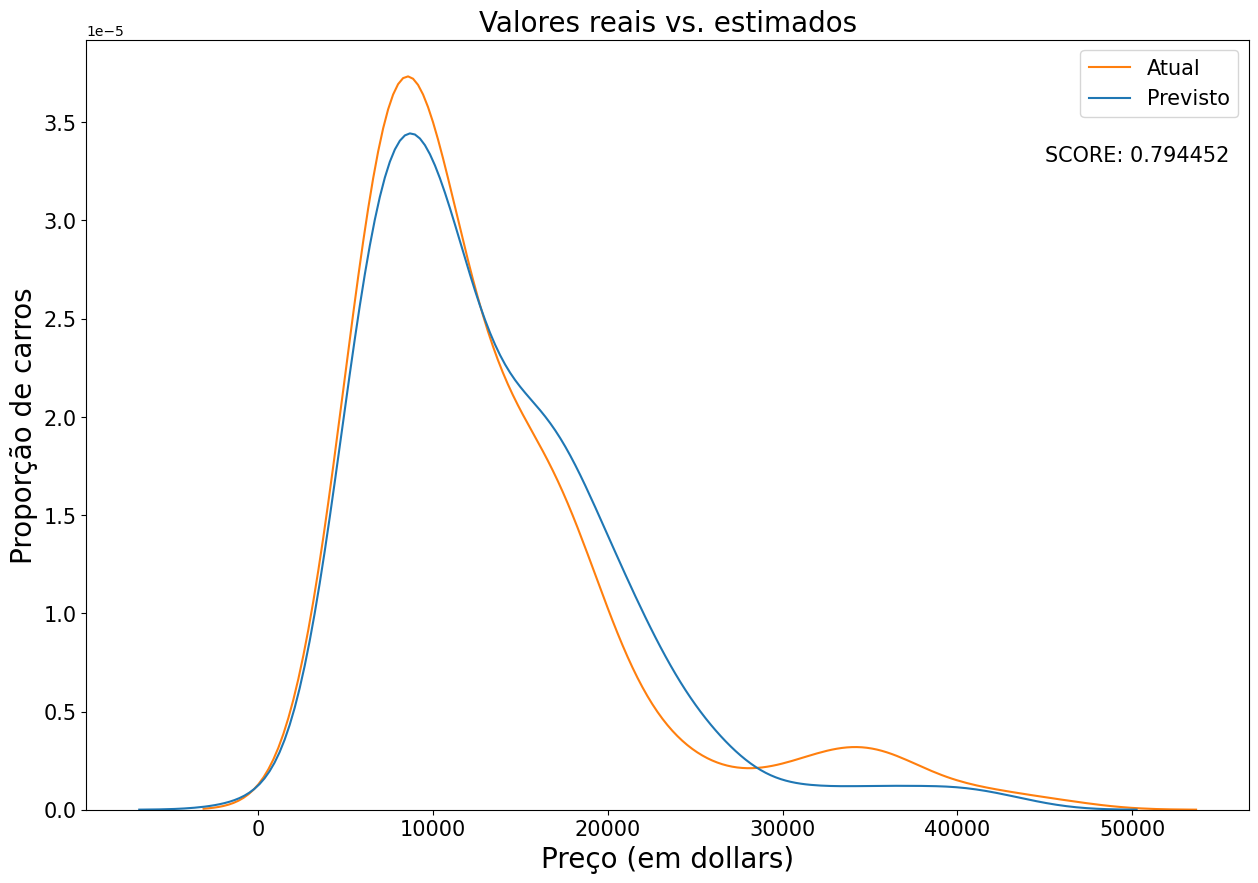

In [81]:
plt.figure(figsize=(15, 10))

sns.kdeplot(data = [lm.predict(X),df_dummy_dicotomica['price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %4f" % R2

plt.text(45000, 0.000033, tt, size = 15)

Text(0.5, 0, 'Resíduo (em dollars)')

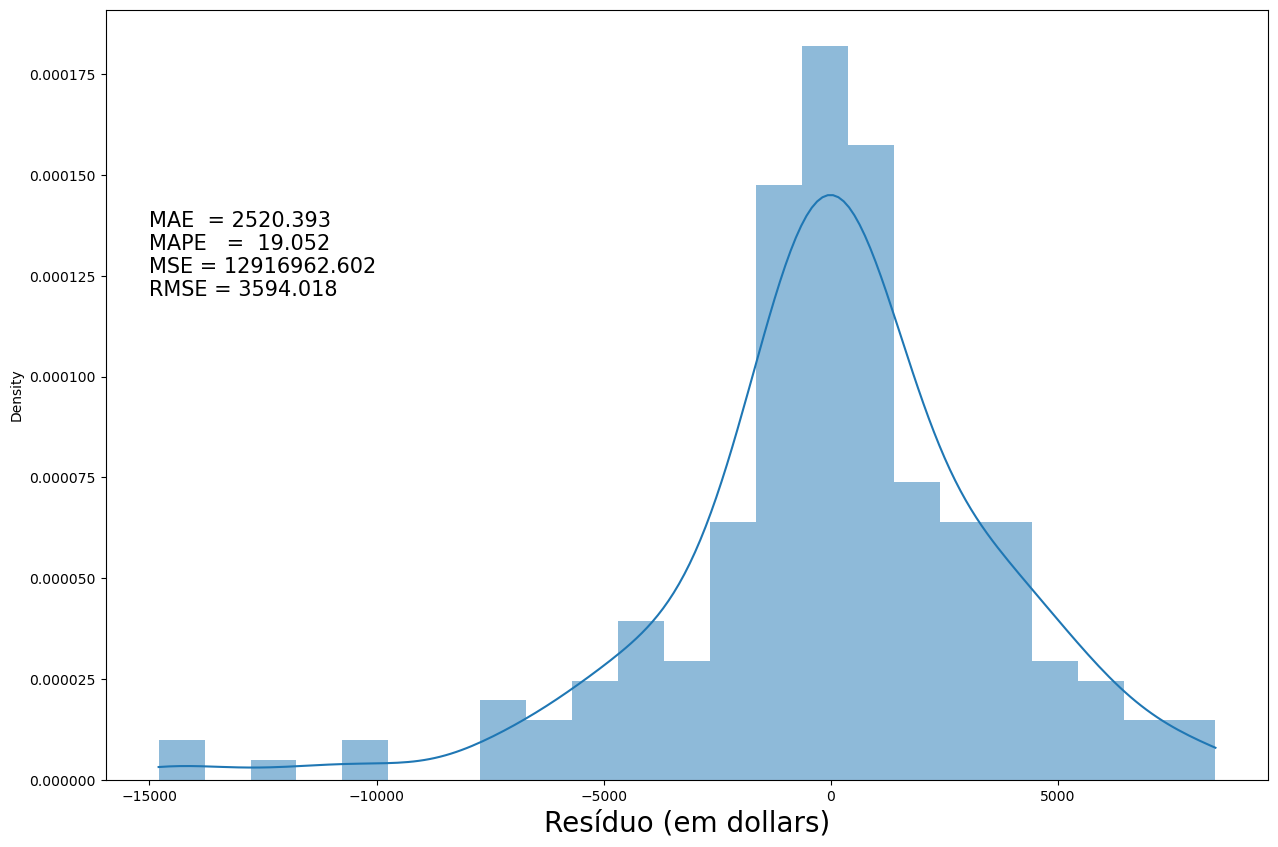

In [82]:
# Erro
y_train = df_dummy_dicotomica['price']
y_pred  = lm.predict(X)

mae = mean_absolute_error(y_train, y_pred)
mape = 100*mean_absolute_percentage_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

plt.figure(figsize=(15, 10))

tt = "MAE  = %.3f \nMAPE   =  %.3f \nMSE = %.3f \nRMSE = %.3f" % (mae,mape,mse,rmse)

sns.histplot(x=y_pred-df_dummy_dicotomica['price'], kde=True, stat="density", linewidth=0)
plt.text(-15000, 0.00012, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)

In [83]:
X = df_dummy_dicotomica[df_dummy_dicotomica.drop(labels='price',axis='columns').columns]
Y = df_dummy_dicotomica['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Carregando o modelo
lm.fit(X_train, y_train)

# Exibindo o R^2
R2_train=lm.score(X_train, y_train)
R2_test=lm.score(X_test, y_test)

print("SCORE Train: %.4f \nSCORE Test: %.4f" % (R2_train,R2_test))

SCORE Train: 0.8076 
SCORE Test: 0.7362


### Variáveis Politômicas

In [84]:
lm = LinearRegression()
lm

LinearRegression()

In [85]:
df_dummy_politomica = df[['price','engine-size', 'curb-weight','make']].copy(deep=True)

df_dummy_politomica.head()

,price,engine-size,curb-weight,make
0,13495.0,130,2548,alfa-romero
1,16500.0,130,2548,alfa-romero
2,16500.0,152,2823,alfa-romero
3,13950.0,109,2337,audi
4,17450.0,136,2824,audi


## Verificando os valores e corrigindo os "duplicados"

In [86]:
df_categorias_make = pd.DataFrame({'cat': df_dummy_politomica['make'].unique()})
df_categorias_make

,cat
0,alfa-romero
1,audi
2,bmw
3,BMW
4,chevrolet
5,dodge
6,doge
7,honda
8,isuzu
9,jaguar


In [87]:
df_dummy_politomica['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'BMW', 'chevrolet', 'dodge', 'doge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'VW', 'volv1', 'volvo'],
      dtype=object)

In [88]:
df_dummy_politomica['make'] = df_dummy_politomica['make'].replace({'bmw': 'BMW'})

In [89]:
df_categorias_make = pd.DataFrame({'cat': df_dummy_politomica['make'].unique()})
df_categorias_make

,cat
0,alfa-romero
1,audi
2,BMW
3,chevrolet
4,dodge
5,doge
6,honda
7,isuzu
8,jaguar
9,mazda


In [90]:
df_dummy_politomica['make'] = df_dummy_politomica['make'].replace({'doge': 'dodge', 'VW':'volkswagen', 'volv1':'volvo' })

df_categorias_make = pd.DataFrame({'cat': df_dummy_politomica['make'].unique()})
df_categorias_make

,cat
0,alfa-romero
1,audi
2,BMW
3,chevrolet
4,dodge
5,honda
6,isuzu
7,jaguar
8,mazda
9,mercedes-benz


In [91]:
# Crie uma instância do codificador OneHotEncoder
encoder = OneHotEncoder()

# Ajuste e transforme os dados da coluna "make"
dummy_array = encoder.fit_transform(df_dummy_politomica[['make']])

# Crie um DataFrame Pandas com as variáveis dummy
dummy_df = pd.DataFrame(dummy_array.toarray(), columns=encoder.get_feature_names_out(['make']))

# Concatene o DataFrame dummy com os outros dados
df_dummy_politomica = pd.concat([df_dummy_politomica.drop('make', axis=1), dummy_df], axis=1)

df_dummy_politomica.head()

,price,engine-size,curb-weight,make_BMW,make_alfa-romero,make_audi,make_chevrolet,make_dodge,make_honda,make_isuzu,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,13495.0,130,2548,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16500.0,130,2548,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16500.0,152,2823,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13950.0,109,2337,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17450.0,136,2824,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
X = df_dummy_politomica[df_dummy_politomica.drop(labels='price',axis='columns').columns]
Y = df_dummy_politomica['price']

# Carregando o modelo
lm.fit(X, Y)

# Exibindo o R^2
R2=lm.score(X,Y)

print("SCORE: %.4f" % R2)

SCORE: 0.9279


Text(45000, 3.3e-05, 'SCORE: 0.927893')

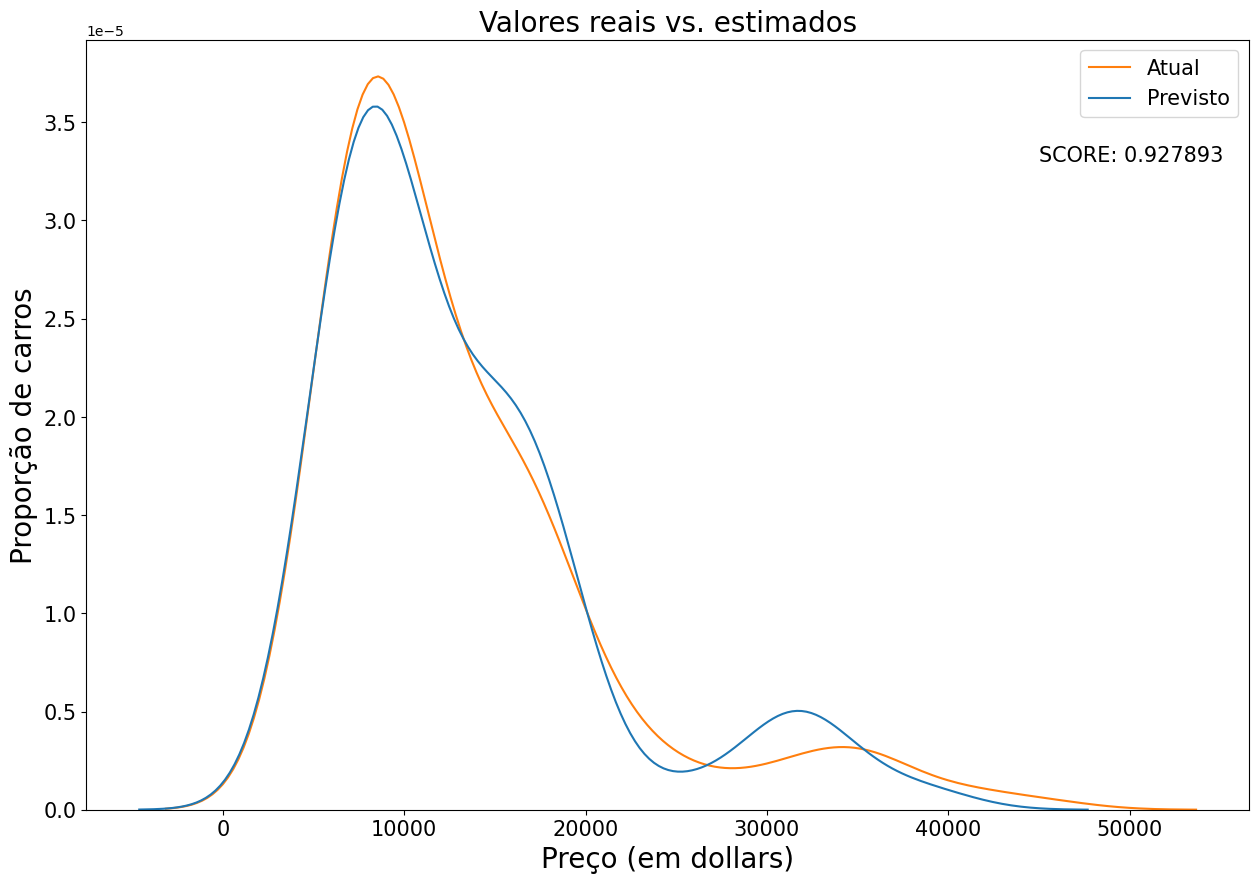

In [93]:
plt.figure(figsize=(15, 10))

sns.kdeplot(data = [lm.predict(X),df_dummy_politomica['price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %4f" % R2

plt.text(45000, 0.000033, tt, size = 15)

Text(0.5, 0, 'Resíduo (em dollars)')

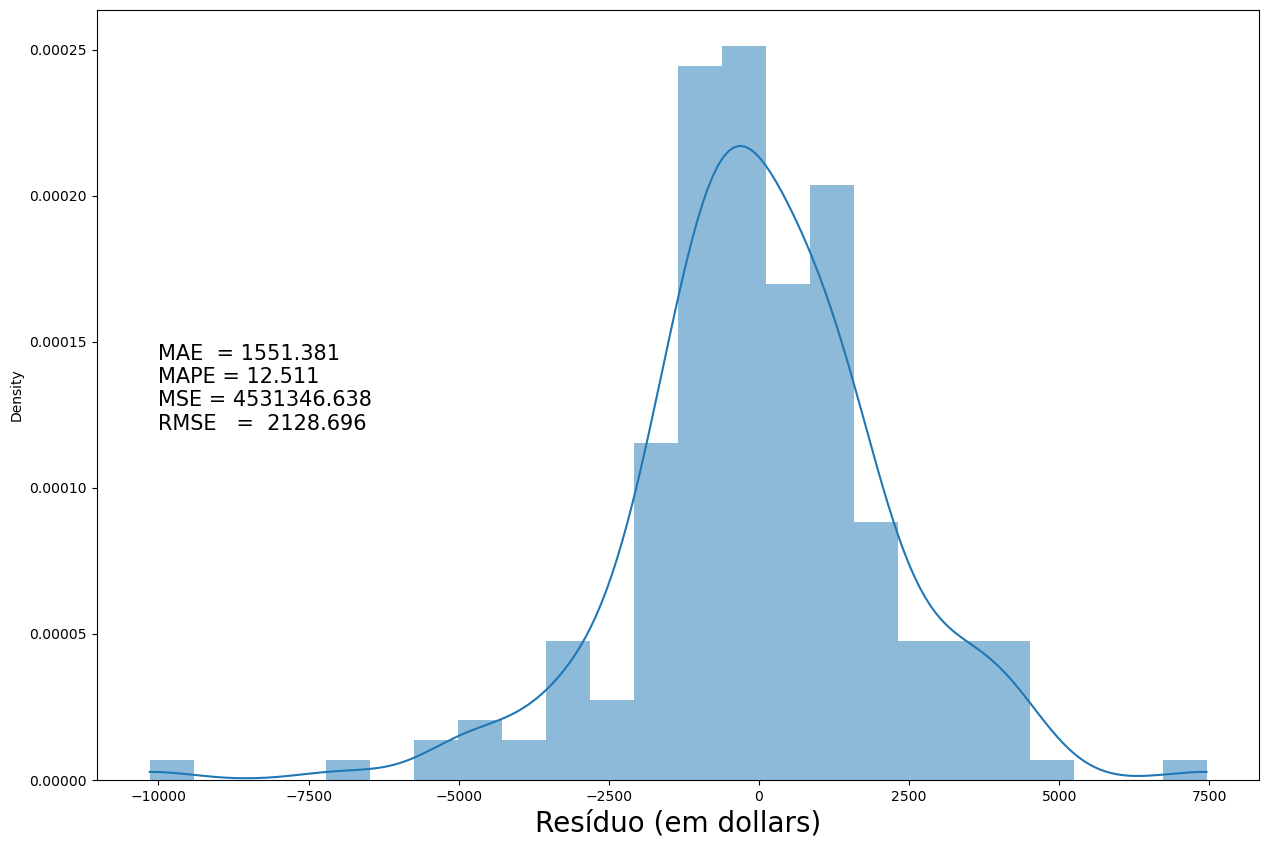

In [94]:
y_train = df_dummy_politomica['price']
y_pred  = lm.predict(X)

mae = mean_absolute_error(y_train, y_pred)
mape = 100*mean_absolute_percentage_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

plt.figure(figsize=(15, 10))

tt = "MAE  = %.3f \nMAPE = %.3f \nMSE = %.3f \nRMSE   =  %.3f" % (mae, mape, mse, rmse)

sns.histplot(x=y_pred-df_dummy_politomica['price'], kde=True, stat="density", linewidth=0)
plt.text(-10000, 0.00012, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)

In [95]:
X = df_dummy_politomica[df_dummy_politomica.drop(labels='price',axis='columns').columns]
Y = df_dummy_politomica['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Carregando o modelo
lm.fit(X_train, y_train)

# Exibindo o R^2
R2_train=lm.score(X_train, y_train)
R2_test=lm.score(X_test, y_test)

print("SCORE Train: %.4f \nSCORE Test: %.4f" % (R2_train,R2_test))

SCORE Train: 0.9295 
SCORE Test: 0.9086


### Utilizando todas as variáveis

In [96]:
cat = ['object']
df_cat = df.select_dtypes(include=cat)
df_cat

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
196,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
197,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
198,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
199,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [97]:
for col in df_cat.columns:
    print(col,df_cat[col].unique())

#mudar make
#'bmw', 'BMW'
#'dodge', 'doge'
#'volkswagen', 'VW'
#'volv1', 'volvo'

make ['alfa-romero' 'audi' 'bmw' 'BMW' 'chevrolet' 'dodge' 'doge' 'honda'
 'isuzu' 'jaguar' 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan'
 'peugot' 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota'
 'volkswagen' 'VW' 'volv1' 'volvo']
fuel-type ['gas' 'diesel']
aspiration ['std' 'turbo']
num-of-doors ['two' 'four']
body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels ['rwd' 'fwd' '4wd']
engine-location ['front' 'rear']
engine-type ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
num-of-cylinders ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuel-system ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [98]:
df_cat['make'] = df_cat['make'].replace({'bmw': 'BMW','doge':'dodge','volkswagen':'VW','volvo':'volv1'})

In [99]:
# Crie uma instância do codificador OneHotEncoder
encoder = OneHotEncoder()

# Ajuste e transforme os dados da coluna "make"
dummy_array = encoder.fit_transform(df_cat)

# Crie um DataFrame Pandas com as variáveis dummy
dummy_df = pd.DataFrame(dummy_array.toarray(), columns=encoder.get_feature_names_out())

# Concatene o DataFrame dummy com os outros dados
df_dummy_politomica = pd.concat([df.drop(df.select_dtypes(include=cat).columns, axis=1), dummy_df], axis=1)

df_dummy_politomica.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,164,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [100]:
X = df_dummy_politomica[df_dummy_politomica.drop(labels='price',axis='columns').columns]
Y = df_dummy_politomica['price']

# Carregando o modelo
lm.fit(X, Y)

# Exibindo o R^2
R2=lm.score(X,Y)

print("SCORE: %.4f" % R2)

SCORE: 0.9673


Text(45000, 3.3e-05, 'SCORE: 0.967304')

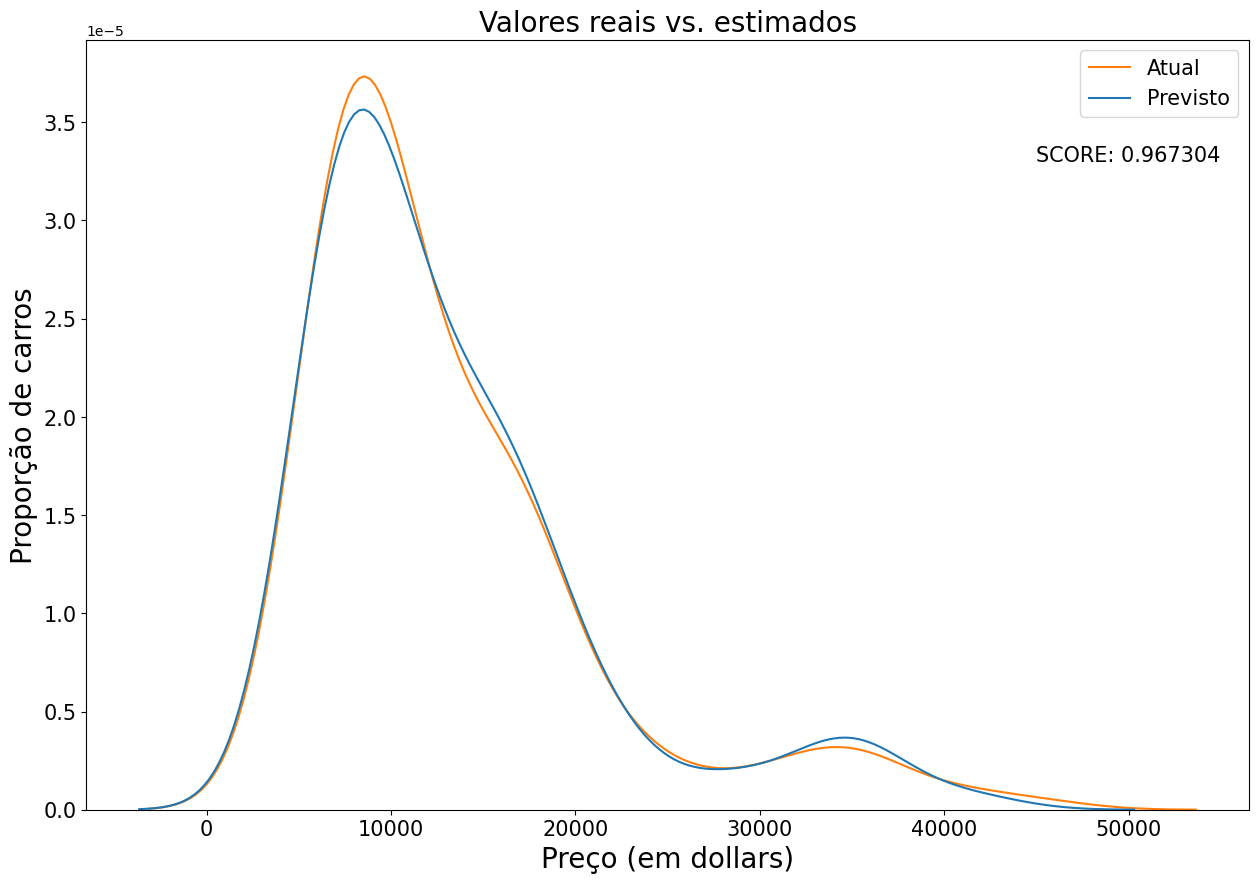

In [101]:
plt.figure(figsize=(15, 10))

sns.kdeplot(data = [lm.predict(X),df_dummy_politomica['price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %4f" % R2

plt.text(45000, 0.000033, tt, size = 15)

Text(0.5, 0, 'Resíduo (em dollars)')

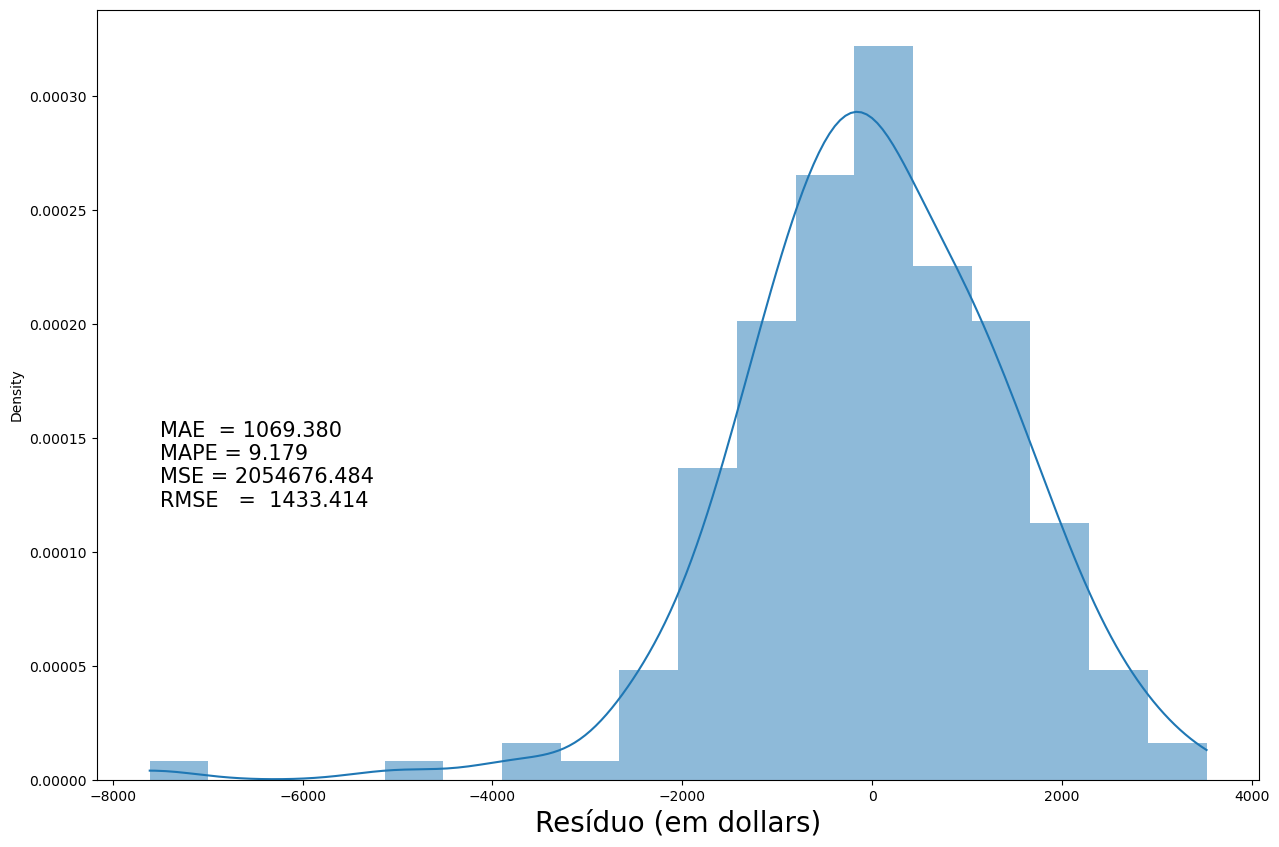

In [102]:
y_train = df_dummy_politomica['price']
y_pred  = lm.predict(X)

mae = mean_absolute_error(y_train, y_pred)
mape = 100*mean_absolute_percentage_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

plt.figure(figsize=(15, 10))

tt = "MAE  = %.3f \nMAPE = %.3f \nMSE = %.3f \nRMSE   =  %.3f" % (mae, mape, mse, rmse)

sns.histplot(x=y_pred-df_dummy_politomica['price'], kde=True, stat="density", linewidth=0)
plt.text(-7500, 0.00012, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)

In [103]:
X = df_dummy_politomica[df_dummy_politomica.drop(labels='price',axis='columns').columns]
Y = df_dummy_politomica['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Carregando o modelo
lm.fit(X_train, y_train)

# Predizendo os valores
#df_dummy_politomica.loc[:,'YHat'] = lm.predict(X)

# Exibindo o R^2
R2_train=lm.score(X_train, y_train)
R2_test=lm.score(X_test, y_test)

print("SCORE Train: %.4f \nSCORE Test: %.4f" % (R2_train,R2_test))

SCORE Train: 0.9666 
SCORE Test: 0.8841


## Referências:

Translated and inspired in the material developed by IBM:
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>
<br>

Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>

Documentação da biblioteca <a href="https://seaborn.pydata.org/">Seaborn</a>

Documentação do biblioteca <a href="https://matplotlib.org/">Matplotlib</a>

Documentação do biblioteca <a href="https://numpy.org/devdocs/reference/index.html">Numpy</a>

## Fique Conectado

- [![YouTube](https://img.icons8.com/ios-filled/40/000000/youtube-play.png)](https://www.youtube.com/@LigaDataScience/videos)  
  Explore nossos vídeos educacionais e webinars sobre ciência de dados, machine learning e inteligência artificial. Inscreva-se para não perder nenhuma atualização!

- [![LinkedIn](https://img.icons8.com/ios-filled/40/000000/linkedin.png)](https://www.linkedin.com/company/liga-data-science-ufpr/)  
  Siga-nos no LinkedIn para as últimas novidades, oportunidades de carreira e networking profissional no campo da ciência de dados.

- [![Instagram](https://img.icons8.com/ios-filled/40/000000/instagram-new.png)](https://www.instagram.com/ligadatascience/)  
  Confira nosso Instagram para conteúdos dos bastidores, destaques de eventos e o dia a dia da Liga Data Science. Faça parte da nossa jornada!


## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>, <a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a> , <a href="https://www.linkedin.com/in/joão-gabriel-santin-botelho/" target="_blank">João Gabriel</a>

## Referências:

Traduzido e inspirado do material desenvolviedo pela IBM:
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>
<br>

* Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>
* Documentação da biblioteca <a href="https://seaborn.pydata.org/">Seaborn</a>
* Documentação do biblioteca <a href="https://matplotlib.org/">Matplotlib</a>
* Documentação do biblioteca <a href="https://numpy.org/devdocs/reference/index.html">Numpy</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 04-04-2021       | 1.0     | Eduardo Pecora    | Inicial               |
| 03-11-2021       | 1.1     | Eduardo Pecora    | Estrutura Aula        |
| 08-03-2022       | 1.2     | Eduardo Pecora    | GitHub                |
| 17-04-2023       | 1.3     | Hesau Hugo        | Reestruturação        |
| 18-09-2024       | 1.4     | João Gabriel      | Atualização           |